# **[<font color = 'lightseagreen'>European Restaurant Reviews](https://www.kaggle.com/datasets/gorororororo23/european-restaurant-reviews/data)**

<font color = 'lightseagreen'>
Context

>  Here are reviews written by customers, the reviews divided into two parts negative reviews and positive reviews, and reviews are important for every restaurant.



<font color = 'lightseagreen'>
Content

>  The data set consists of 6 columns and rows (which are added daily).



<font color = 'lightseagreen'>
Columns Description
 <font color = 'lightseagreen'>

*   Country: The country where the restaurant is located.
*   Restaurant Name: Name of the restaurant being reviewed.


*   Sentiment: (Positive/Negative) sentiment of the review.

*  Review Title: The headline or title of the review.




*   Review Date: When the review was posted.
*   Review: Description of the review content.






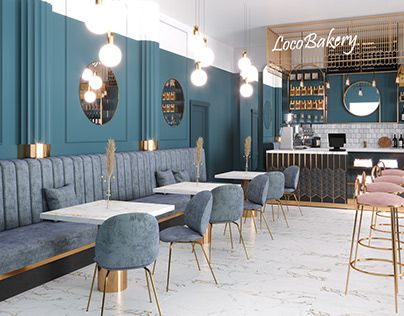





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

from nltk.tokenize import word_tokenize , sent_tokenize
from nltk.corpus import stopwords
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
data = pd.read_csv("/content/archive (6).zip")

In [4]:
data.head()

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the c...
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,..."
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al..."
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,From the start this meal was bad- especially g...


<ipython-input-5-e7d9848017d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment",data=data , palette="viridis")


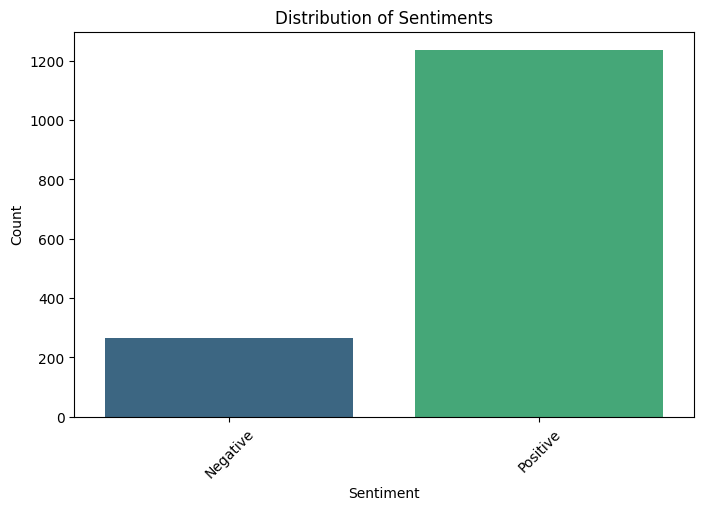

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(x="Sentiment",data=data , palette="viridis")
plt.xticks(rotation=45)
plt.title("Distribution of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

<ipython-input-6-9a8012e6fe4f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_count.index,y=country_count.values,palette="viridis")


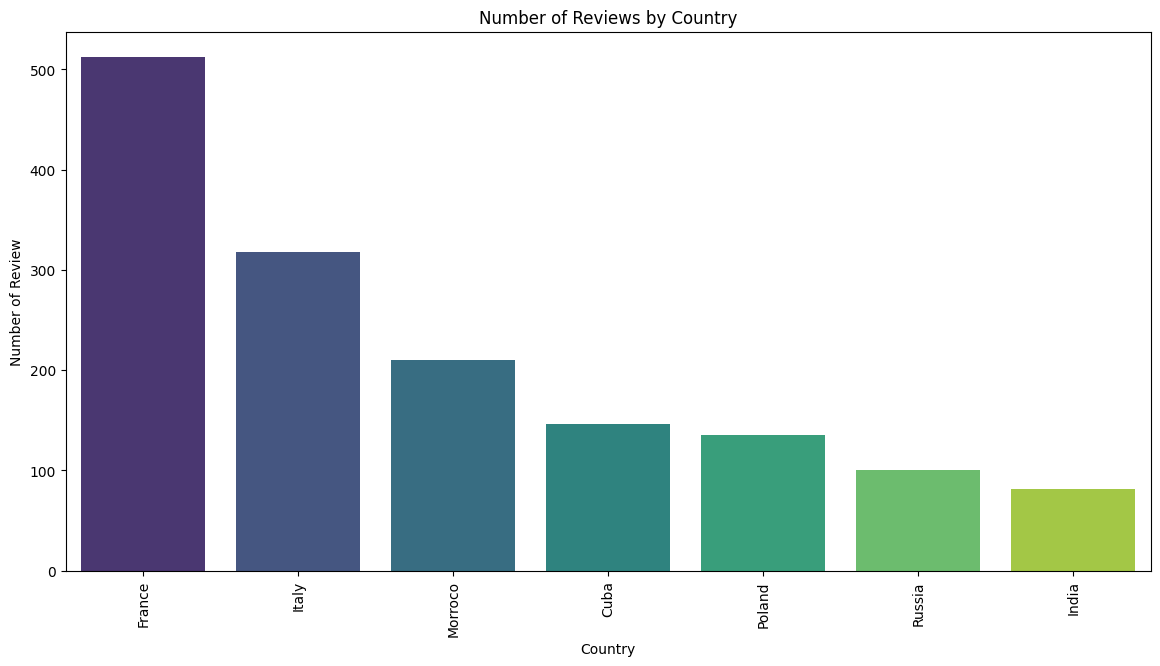

In [6]:
plt.figure(figsize=(14,7))
country_count=data["Country"].value_counts()
sns.barplot(x=country_count.index,y=country_count.values,palette="viridis")
plt.title("Number of Reviews by Country")
plt.xlabel("Country")
plt.ylabel("Number of Review")
plt.xticks(rotation=90)
plt.show()

In [7]:
def clean_review_date(date_str):
    try:
        date_str = date_str.split('•')[0].strip()  # Remove the special character and trim spaces
        if "Sept" in date_str:
            date_str = date_str.replace("Sept", "Sep")
        return pd.to_datetime(date_str, format='%b %Y', errors='coerce')
    except ValueError:
        return pd.NaT

In [8]:
data['Cleaned Review Date'] = data['Review Date'].apply(clean_review_date)

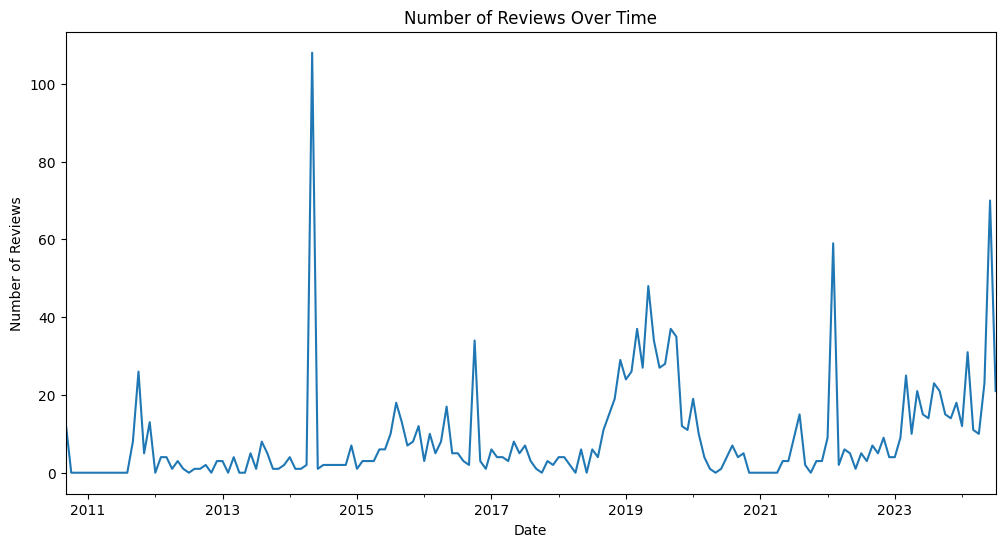

In [9]:
# Convert 'Cleaned Review Date' to datetime and set it as index
data['Cleaned Review Date'] = pd.to_datetime(data['Cleaned Review Date'])
data = data.set_index('Cleaned Review Date')

# Now you can resample
reviews_over_time = data.resample('M').size()

plt.figure(figsize=(12, 6))
reviews_over_time.plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

<ipython-input-10-c3319ef1a1ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=data, palette='viridis')


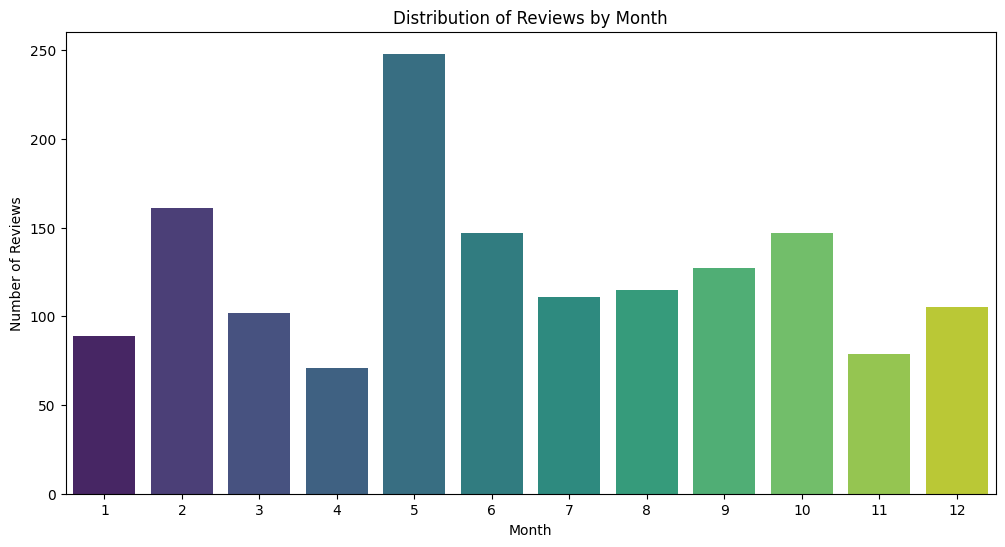

In [10]:
data['Month'] = data.index.month
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=data, palette='viridis')
plt.title('Distribution of Reviews by Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()

In [11]:
from wordcloud import WordCloud

In [ ]:
# print(len(positive_reviews))


0


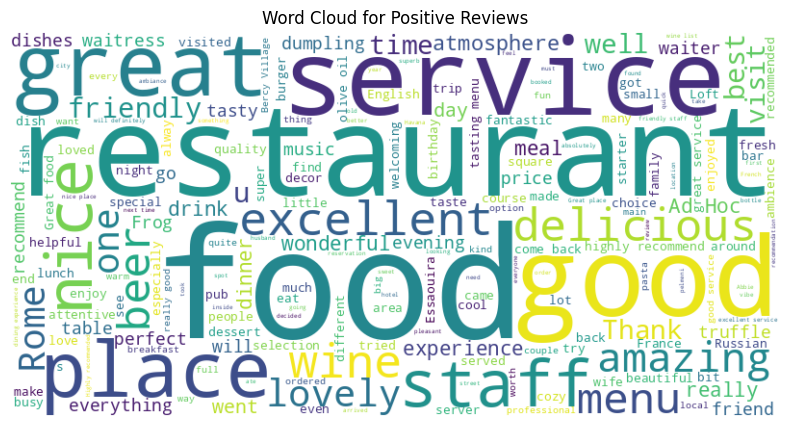

In [12]:
# Word Cloud for Positive Reviews
positive_reviews = data[data['Sentiment'] == 'Positive']['Review'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

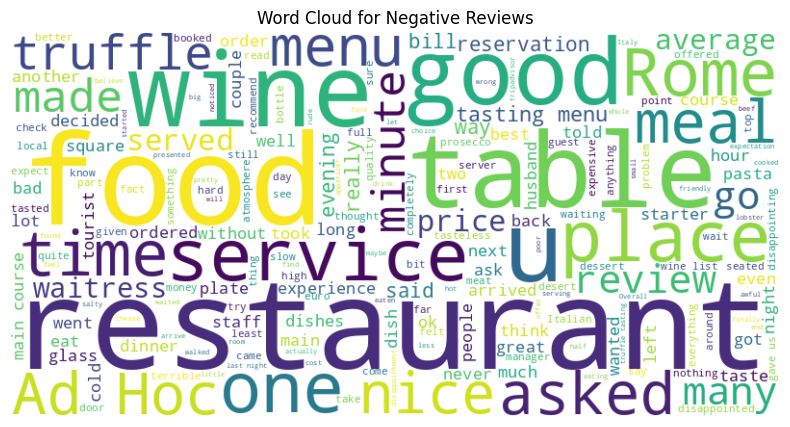

In [13]:
# Word Cloud for Negative Reviews
positive_reviews = data[data['Sentiment'] == 'Negative']['Review'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-14-73bbe9691853>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


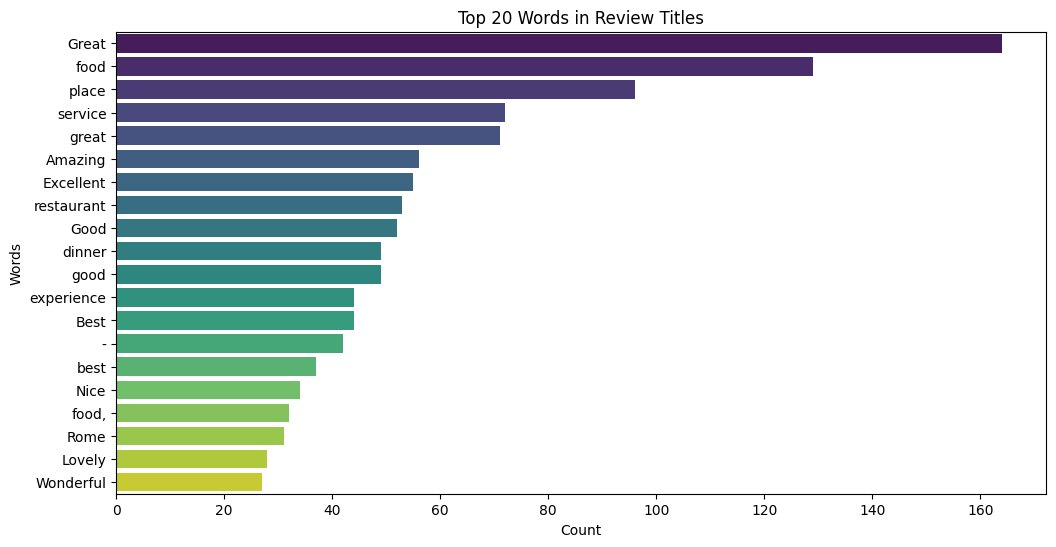

In [14]:
# Top Words in Review Titles
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

review_titles = data['Review Title'].str.cat(sep=' ')
words = review_titles.split()
filtered_words = [word for word in words if word.lower() not in stop_words]
word_counts = Counter(filtered_words)
# top_words = word_counts.most

# Plot the top 20 words in review titles
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title('Top 20 Words in Review Titles')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

In [15]:
# Top Restaurants by Positive and Negative Sentiment
top_positive_restaurants = data[data['Sentiment'] == 'Positive']['Restaurant Name'].value_counts().head(10)
top_negative_restaurants = data[data['Sentiment'] == 'Negative']['Restaurant Name'].value_counts().head(10)

<ipython-input-16-f15d0c990cd0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_positive_restaurants.values, y=top_positive_restaurants.index, palette='viridis')


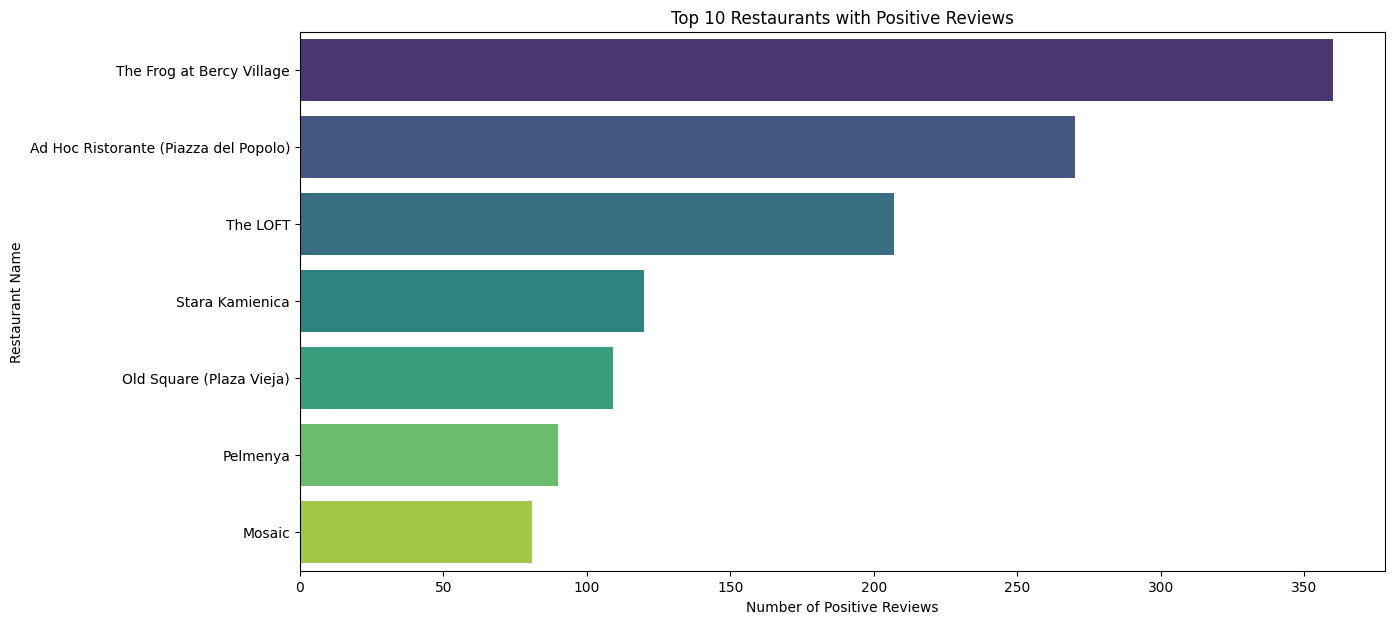

In [16]:
plt.figure(figsize=(14, 7))
sns.barplot(x=top_positive_restaurants.values, y=top_positive_restaurants.index, palette='viridis')
plt.title('Top 10 Restaurants with Positive Reviews')
plt.xlabel('Number of Positive Reviews')
plt.ylabel('Restaurant Name')
plt.show()

<ipython-input-17-a427e6fea567>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_negative_restaurants.values, y=top_negative_restaurants.index, palette='viridis')


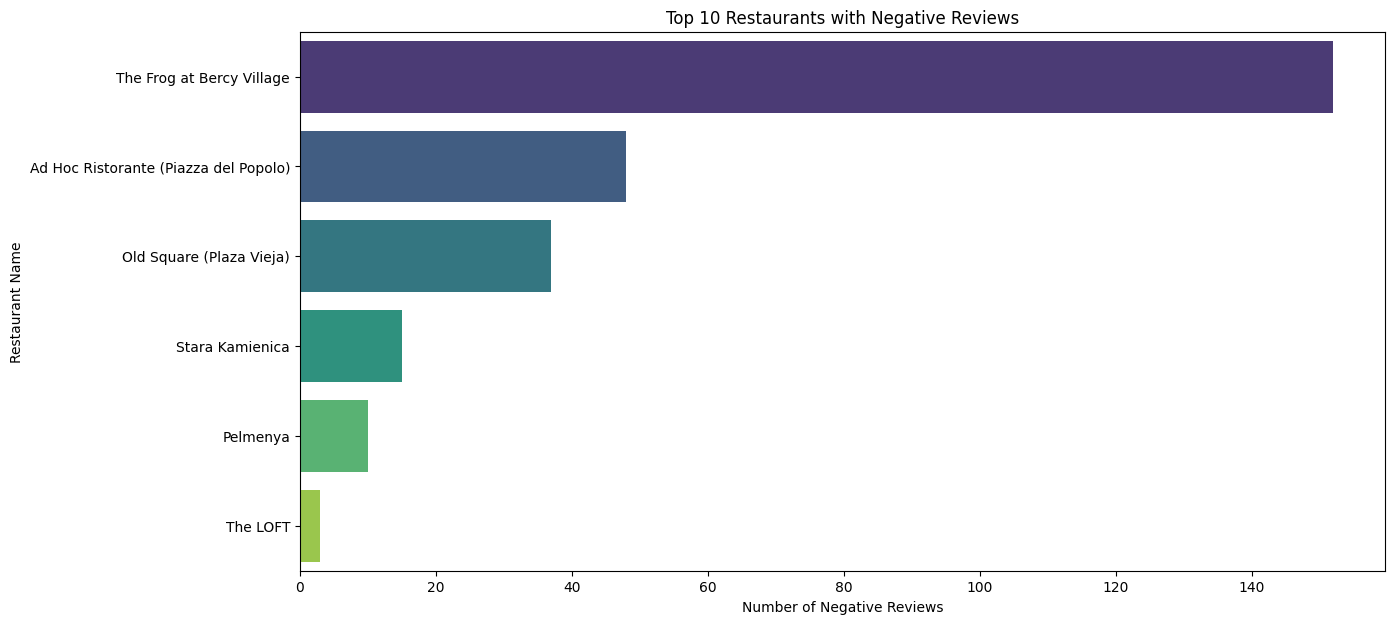

In [17]:
plt.figure(figsize=(14, 7))
sns.barplot(x=top_negative_restaurants.values, y=top_negative_restaurants.index, palette='viridis')
plt.title('Top 10 Restaurants with Negative Reviews')
plt.xlabel('Number of Negative Reviews')
plt.ylabel('Restaurant Name')
plt.show()

In [18]:
#Let's create a column to check of each text & plot a histogram to check the distirbution
data['Reviewlen'] = data['Review'].apply(len)
display(data.head())

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review,Month,Reviewlen
Cleaned Review Date,,,,,,,,
2024-05-01,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the c...,5,146
2024-02-01,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,...",2,281
2023-11-01,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al...",11,260
2023-03-01,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...,3,1513
2022-11-01,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,From the start this meal was bad- especially g...,11,1351


In [19]:

import plotly.express as px

# Define custom colors for each sentiment category
color_map = {'Positive': 'lightseagreen', 'Negative' : 'mediumslateblue'}

fig = px.histogram(data, x='Reviewlen', color='Sentiment', marginal='rug',
                   title='Histogram of Review Length by Category',
                   color_discrete_map=color_map)

fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

fig.show()

<Figure size 1400x700 with 0 Axes>

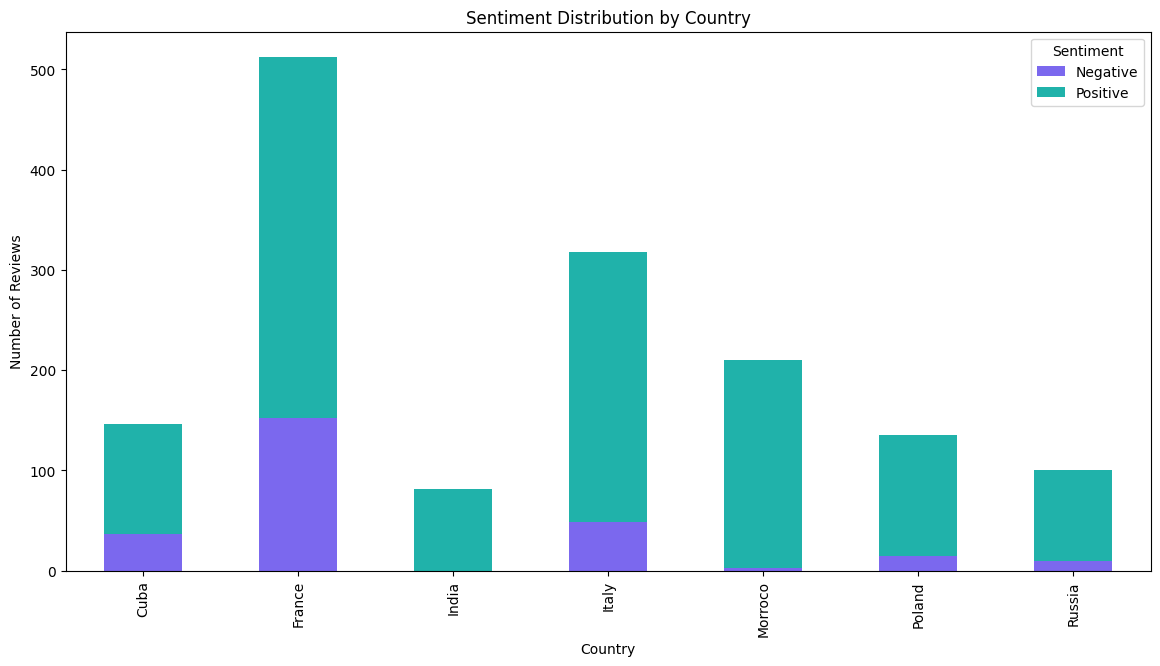

In [20]:
plt.figure(figsize=(14, 7))
sentiment_by_country = data.groupby(['Country', 'Sentiment']).size().unstack().fillna(0)

# Convert the color_map dictionary to a list of colors for the bars
colors = [color_map[c] for c in sentiment_by_country.columns]

sentiment_by_country.plot(kind='bar', stacked=True, figsize=(14, 7), color=colors) # Use color argument instead of colormap

plt.title('Sentiment Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Reviews')
plt.show()

In [21]:

def preprocess_text(text):
  st = string.punctuation
  data_processed = text.lower()
  data_processed = word_tokenize(data_processed)
  stop_words = set(stopwords.words('english'))
  st = [] # You need to define st
  data_processed = [word for word in data_processed if word not in stop_words and word not in st ]
  lemmatizer = WordNetLemmatizer()
  data_processed = [lemmatizer.lemmatize(word) for word in data_processed]
  data_processed = ' '.join(data_processed)

  return data_processed

In [22]:
data["Review"] = data["Review"].apply(preprocess_text)

In [23]:
data["Review"]

,Review
Cleaned Review Date,
2024-05-01,manager became agressive said carbonara good . rude . bad experience . worst rome many year .
2024-02-01,"ordered beef fillet ask done medium , got well done cooked dry , told took steak 20 minute brought another steak completely rare , left steak , asked charged fool price ."
2023-11-01,"attractive venue welcoming , albeit somewhat slow service . offering pleasingly presented everything taste . though ingredient assembled without seasoning : lovely restaurant , except food ."
2023-03-01,"sadly used high tripadvisor rating literally . fortunate eat number fine restaurant know amazing buzz mouthful fine freshly cooked food great chef . never eaten tasting menu never . ad hoc great ambience attentive friendly service paired wine exceptional . maybe hit night chef every single course food certainly freshly cooked , passed kitchen way bathroom , noticed plate precooked food ready go tasting menu plate . odd dish disappointed , would accepted might palate liking . every plate food hot , bland , lacking spark probably sitting around while.l serving staff great wine failed finish plate offered . tasting menu looked good value simple bowl hot freshly cooked pasta would done better justice wine . asked , admitted , great english understatement , disappointed . found 17 euro deducted 190 euro bill nice noticed . probably best avoid tasting menu enjoy great wine selection pasta maybe cheese course . feel responsible made poor choice realizing place geared tourist . expensive mistake ."
2022-11-01,"start meal bad- especially given price . visited husband birthday recommended local hotel . lady charge appeared table arrived basically up-sell truffle menu . plonked truffle table explanation would enhance dish gave u rehearsed speech proceeded repeat word word every single table . food good could forgiven ’ . best part bland bit least inoffensive - nothing seasoned sauce completely tasteless strange weird combination . worst part meal husband inedible medallion ‘ lamb ’ dish . made tiny amount lamb gristle fat wrapped around mushy stuff ’ identify . fillet beef sort well cooked ( frankly hard get wrong ) served exactly sauce lamb , reconstituted mash strange tube shape tasteless , watery spinach . asked wine recommendation . wine ok ’ told , ’ explained u ( ask mine told ‘ local ’ ) ’ offered try . much choice nearby many better ( much cheaper option ) ’ avoid ."
2021-07-01,"visited restaurant saturday night disappointing service food experience ever . partner 's bday celebration weekend . restaurant run blonde manager daughter wich terrible attitude , made sure never back . sitting table near window ac outside 35 degree . halfway meal ( truffle tasting menu wine pairing ) , asked move anywhere else warm . young waitress ( daughter ) asked manager ( mum ) move u , reply sharp ! ! ! ! ! also , dog pooped front u , pedestrian side , apparently , according waitress , nothing concerned restaurant . anyhow crazy hot nice poo view . could move anywhere even though restaurant empty , reason . asked talk mum ( manager ) never touch table acknowledges u . deny couple 230 euro bill move another table restaurant empty ? finally , gem waitress curly hair approached table moved u another spot , spent rest evening confinement said one side restaurant empty whole night . managing restaurant whole life , never gave awful service attitude guest . tempo service completely wrong , food getting table way earlier wine . wine poured glass set station 20 minute served , subjected bacteria dust since everyone passing . food good used first-class fine dining service keep place !"
2020-01-01,"tired tasting menu wine pairing . food interesting , tasty overall wasted time money . would come back would recommend"
2019-10-01,"restaurant ’ high rating wholly unwarranted . looking forward ad hoc ’ truffle menu week white truffle season left sorely disappointed . food flavorless , served cold , overpriced boot . seemed dish made advan

In [24]:
#Let's Label the data as 0 & 1 i.e. POsitive as 1 & Negative as 0
data.loc[:,'Sentiment'] = data.Sentiment.map({'Negative':0, 'Positive':1})
data['Sentiment'] = data['Sentiment'].astype(int)
data.head()


,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review,Month,Reviewlen
Cleaned Review Date,,,,,,,,
2024-05-01,France,The Frog at Bercy Village,0,Rude manager,May 2024 •,manager became agressive said carbonara good ....,5,146
2024-02-01,France,The Frog at Bercy Village,0,A big disappointment,Feb 2024 •,"ordered beef fillet ask done medium , got well...",2,281
2023-11-01,France,The Frog at Bercy Village,0,Pretty Place with Bland Food,Nov 2023 •,"attractive venue welcoming , albeit somewhat s...",11,260
2023-03-01,France,The Frog at Bercy Village,0,Great service and wine but inedible food,Mar 2023 •,sadly used high tripadvisor rating literally ....,3,1513
2022-11-01,France,The Frog at Bercy Village,0,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,start meal bad- especially given price . visit...,11,1351


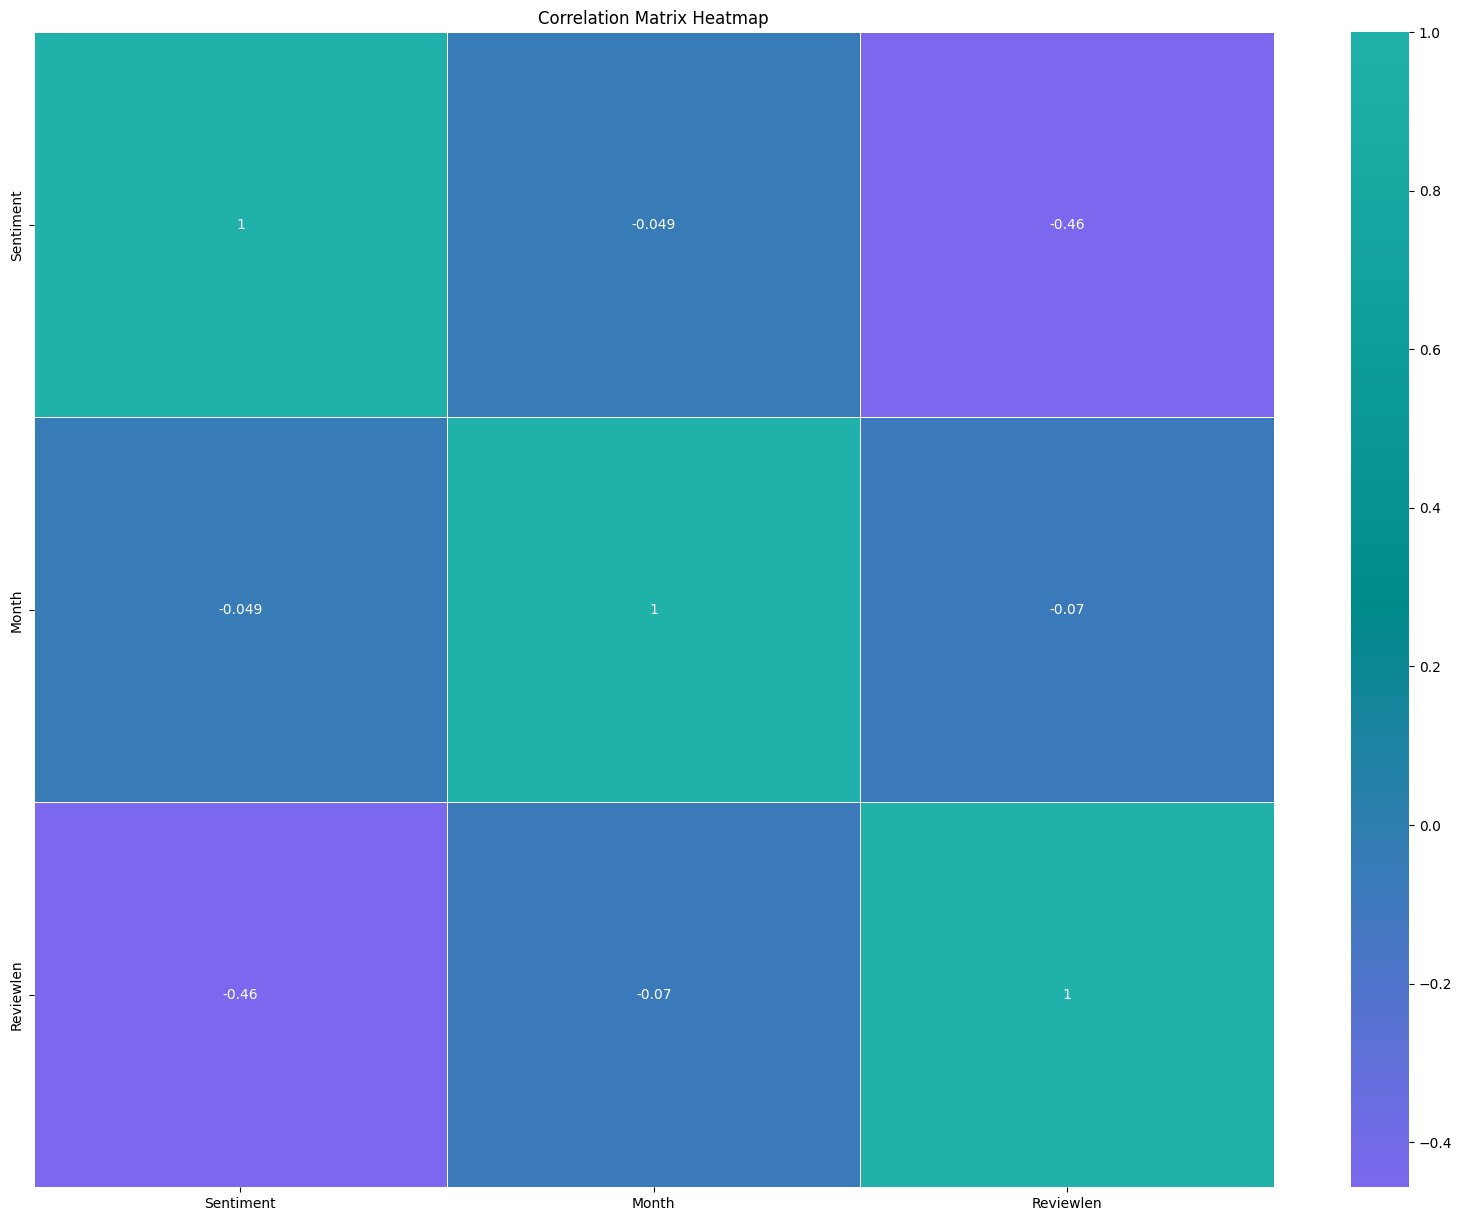

In [25]:
correlation_matrix = data[data.select_dtypes(exclude='object').columns].corr()
from  matplotlib.colors import LinearSegmentedColormap
c1 = [  'mediumslateblue' ,'darkcyan'  , 'lightseagreen' ]
v = [0, 0.5, 1]
l = list(zip(v,c1))
cmap1=LinearSegmentedColormap.from_list('rg',l, N=256)
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap= cmap1, linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count = CountVectorizer()
text = count.fit_transform(data['Review'])
#Train & test split
x_train, x_test, y_train, y_test = train_test_split(text, data['Sentiment'], test_size=0.30, random_state=100)

In [27]:
#Let's print the dimentions of the train & test dataset
display('X-Train :', x_train.shape)
display('X-Test :',x_test.shape)
display('Y-Train :',y_train.shape)
display('X-Test :',y_test.shape)


'X-Train :'

(1051, 5689)

'X-Test :'

(451, 5689)

'Y-Train :'

(1051,)

'X-Test :'

(451,)

In [28]:
from sklearn.metrics import accuracy_score , classification_report

In [29]:
# Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

multinomial_nb_model = MultinomialNB()
multinomial_nb_model.fit(x_train, y_train)  # Train the model

prediction = multinomial_nb_model.predict(x_test)

print("Multinomial NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print(classification_report(y_test, prediction))

Multinomial NB
Accuracy score: 0.9490022172949002
              precision    recall  f1-score   support

           0       0.91      0.82      0.87        90
           1       0.96      0.98      0.97       361

    accuracy                           0.95       451
   macro avg       0.94      0.90      0.92       451
weighted avg       0.95      0.95      0.95       451



In [30]:
prediction = multinomial_nb_model.predict(x_train)

print("Multinomial NB")
print("Accuracy score: {}". format(accuracy_score(y_train, prediction)) )
print(classification_report(y_train, prediction))

Multinomial NB
Accuracy score: 0.9857278782112274
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       175
           1       0.98      1.00      0.99       876

    accuracy                           0.99      1051
   macro avg       0.99      0.96      0.97      1051
weighted avg       0.99      0.99      0.99      1051



In [31]:

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

In [32]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
prediction = svc.predict(x_test)
print("SVM")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print(classification_report(y_test, prediction))


SVM
Accuracy score: 0.9068736141906873
              precision    recall  f1-score   support

           0       0.94      0.57      0.71        90
           1       0.90      0.99      0.94       361

    accuracy                           0.91       451
   macro avg       0.92      0.78      0.83       451
weighted avg       0.91      0.91      0.90       451



In [33]:
def user_input(text):
  text = preprocess_text(text)
  text = count.transform([text])
  prediction = multinomial_nb_model.predict(text)
  if prediction == 1:
    return "Positive"
  else:
    return "Negative"
  return text

In [34]:
def user_input_svc(text):
  text = preprocess_text(text)
  text = count.transform([text])
  prediction = svc.predict(text)
  if prediction == 1:
    return "Positive"
  else:
    return "Negative"
  return text

In [35]:
user_input("I hate this place")

'Positive'

In [36]:
user_input("I love this place")

'Positive'

In [37]:
print(user_input_svc("I hate this place"))

Positive


In [ ]:
print(text)

  (0, 3061)	1
  (0, 603)	1
  (0, 239)	1
  (0, 4328)	1
  (0, 898)	1
  (0, 2306)	1
  (0, 4300)	1
  (0, 549)	1
  (0, 1928)	1
  (0, 5619)	1
  (0, 4277)	1
  (0, 3074)	1
  (0, 5647)	1
  (1, 3493)	1
  (1, 609)	1
  (1, 2045)	1
  (1, 451)	1
  (1, 1637)	2
  (1, 3132)	1
  (1, 2315)	1
  (1, 5544)	1
  (1, 1275)	1
  (1, 1681)	1
  (1, 5126)	1
  (1, 5137)	1
  :	:
  (1500, 5152)	2
  (1500, 1978)	1
  (1500, 2534)	1
  (1500, 415)	1
  (1500, 3461)	2
  (1500, 192)	1
  (1500, 958)	1
  (1500, 2594)	1
  (1500, 2206)	1
  (1500, 832)	1
  (1500, 1712)	1
  (1500, 2979)	2
  (1500, 3310)	1
  (1500, 3282)	1
  (1500, 1107)	1
  (1500, 2427)	5
  (1500, 3204)	1
  (1501, 2306)	1
  (1501, 549)	1
  (1501, 4481)	1
  (1501, 2121)	2
  (1501, 531)	1
  (1501, 4835)	1
  (1501, 3868)	1
  (1501, 3700)	1


In [38]:
import joblib
joblib.dump(multinomial_nb_model, 'multinomial_nb_model.pkl')




['multinomial_nb_model.pkl']

In [39]:
joblib.load('multinomial_nb_model.pkl')

MultinomialNB()